# Summary of the results

We summarize the results stored in the directories 02_results*.

## Importing some modules.

In [1]:
import numpy as np
import matplotlib.pylab as plt


Bad key "text.kerning_factor" on line 4 in
/home/kamizuka/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Loading data.

In [23]:
data = {}
data['ctl2_det00_tel00'] = {'data':np.loadtxt('02_results_ctl2_det00_tel00/data_accuracy.dat'),'epd':340,'efl':4369,'cuton':0.9,'ace':300,'interpix':0.01}
data['ctl2_det00_tel01'] = {'data':np.loadtxt('02_results_ctl2_det00_tel01/data_accuracy.dat'),'epd':360,'efl':4369,'cuton':0.9,'ace':300,'interpix':0.01}
data['ctl2_det10_tel10'] = {'data':np.loadtxt('02_results_ctl2_det10_tel10/data_accuracy.dat'),'epd':360,'efl':4369,'cuton':1.0,'ace':300,'interpix':0.01}
data['ctl2_det10_tel11'] = {'data':np.loadtxt('02_results_ctl2_det10_tel11/data_accuracy.dat'),'epd':340,'efl':4369,'cuton':1.0,'ace':300,'interpix':0.01}
data['ctl2_det20_tel20'] = {'data':np.loadtxt('02_results_ctl2_det20_tel20/data_accuracy.dat'),'epd':360,'efl':4369,'cuton':1.1,'ace':300,'interpix':0.01}
data['ctl2_det20_tel21'] = {'data':np.loadtxt('02_results_ctl2_det20_tel21/data_accuracy.dat'),'epd':340,'efl':4369,'cuton':1.1,'ace':300,'interpix':0.01}
data['ctl5_det10_tel10'] = {'data':np.loadtxt('02_results_ctl5_det10_tel10/data_accuracy.dat'),'epd':360,'efl':4369,'cuton':1.0,'ace':250,'interpix':0.01}
data['ctl5_det10_tel11'] = {'data':np.loadtxt('02_results_ctl5_det10_tel11/data_accuracy.dat'),'epd':340,'efl':4369,'cuton':1.0,'ace':250,'interpix':0.01}
data['ctl2_det10_tel10a'] = {'data':np.loadtxt('02_results_ctl2_det10_tel10a/data_accuracy.dat'),'epd':360,'efl':4806,'cuton':1.0,'ace':300,'interpix':0.01}
data['ctl2_det10_tel10b'] = {'data':np.loadtxt('02_results_ctl2_det10_tel10b/data_accuracy.dat'),'epd':360,'efl':3972,'cuton':1.0,'ace':300,'interpix':0.01}
data['ctl2_det11_tel10'] = {'data':np.loadtxt('02_results_ctl2_det11_tel10/data_accuracy.dat'),'epd':360,'efl':4369,'cuton':1.0,'ace':300,'interpix':0.02}
data['ctl6_det10_tel10'] = {'data':np.loadtxt('02_results_ctl6_det10_tel10/data_accuracy.dat'),'epd':360,'efl':4369,'cuton':1.0,'ace':0,'interpix':0.01}
data['ctl7_det10_tel10'] = {'data':np.loadtxt('02_results_ctl7_det10_tel10/data_accuracy.dat'),'epd':360,'efl':4369,'cuton':1.0,'ace':300,'interpix':0.00}

# Comparison

Text(0.5, 1.0, 'EFL: 4369 mm; J-H: 2.0 mag; ACE 300 mas; Interpix 1%')

<Figure size 432x288 with 0 Axes>

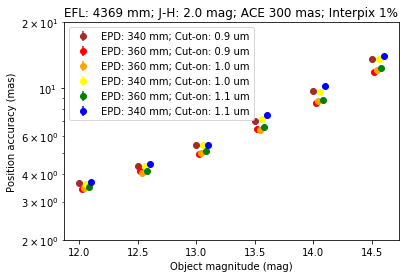

In [34]:
ymin=2; ymax=20; # mas
pixsize = 10e-6 # m
plt.figure(facecolor='white')
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.set_yscale('log')
#ax2.set_yscale('log')
ax.set_ylim([ymin, ymax])
ax.set_ylabel('Position accuracy (mas)')
ax.set_xlabel('Object magnitude (mag)')

colors=['brown', 'red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black']

keys = ['ctl2_det00_tel00', 'ctl2_det00_tel01', 'ctl2_det10_tel10', 'ctl2_det10_tel11', 'ctl2_det20_tel20', 'ctl2_det20_tel21']

for i, k in enumerate(keys):
    d = data[k]
    fct = pixsize/d['efl']/1e-3*180.*3600./np.pi*1000 # px -> mas conv. fct.
    ax.errorbar(d['data'][:,0]+i*0.02, d['data'][:,1]*fct, yerr=d['data'][:,2]*fct,
                color=colors[i], marker='o', linestyle='None',
                label='EPD: {} mm; Cut-on: {} um'.format(d['epd'], d['cuton']))
plt.legend()

plt.title('EFL: 4369 mm; J-H: 2.0 mag; ACE 300 mas; Interpix 1%')

## ACE dependence

Text(0.5, 1.0, 'EPD: 360 mm; EFL: 4369 mm; J-H: 2.0 mag; Cut-on: 1.0 um; Interpix 1%')

<Figure size 432x288 with 0 Axes>

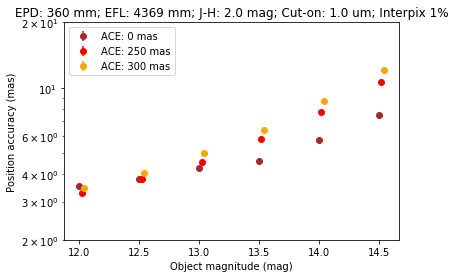

In [28]:
plt.figure(facecolor='white')
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylim([ymin, ymax])
ax.set_ylabel('Position accuracy (mas)')
ax.set_xlabel('Object magnitude (mag)')

keys = ['ctl6_det10_tel10', 'ctl5_det10_tel10', 'ctl2_det10_tel10']

for i, k in enumerate(keys):
    d = data[k]
    fct = pixsize/d['efl']/1e-3*180.*3600./np.pi*1000 # px -> mas conv. fct.
    ax.errorbar(d['data'][:,0]+i*0.02, d['data'][:,1]*fct, yerr=d['data'][:,2]*fct,
                color=colors[i], marker='o', linestyle='None',
                label='ACE: {} mas'.format(d['ace']))
plt.legend()
plt.title('EPD: 360 mm; EFL: 4369 mm; J-H: 2.0 mag; Cut-on: 1.0 um; Interpix 1%')

## Interpixel-flat dependence

Text(0.5, 1.0, 'EPD 360 mm; EFL: 4369 mm; J-H: 2.0 mag; Cut-on: 1.0 um; ACE 300 mas')

<Figure size 432x288 with 0 Axes>

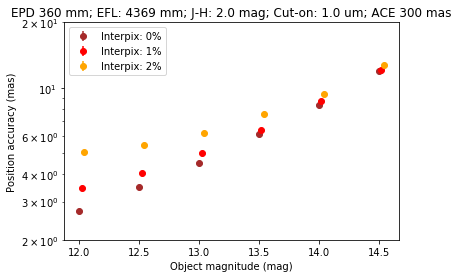

In [22]:
plt.figure(facecolor='white')
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylim([ymin, ymax])
ax.set_ylabel('Position accuracy (mas)')
ax.set_xlabel('Object magnitude (mag)')

keys = ['ctl7_det10_tel10', 'ctl2_det10_tel10', 'ctl2_det11_tel10']

for i, k in enumerate(keys):
    d = data[k]
    if d['cuton']==1.0 and i<=7:
        fct = pixsize/d['efl']/1e-3*180.*3600./np.pi*1000 # px -> mas conv. fct.
        ax.errorbar(d['data'][:,0]+i*0.02, d['data'][:,1]*fct, yerr=d['data'][:,2]*fct,
                    color=colors[i], marker='o', linestyle='None',
                    label='Interpix: {:1.0f}%'.format(d['interpix']*100))
plt.legend()
plt.title('EPD 360 mm; EFL: 4369 mm; J-H: 2.0 mag; Cut-on: 1.0 um; ACE 300 mas')

## EFL dependence

Text(0.5, 1.0, 'EPD 360 mm; J-H: 2.0 mag; Cut-on: 1.0 um; ACE 300 mas; Interpix 1%')

<Figure size 432x288 with 0 Axes>

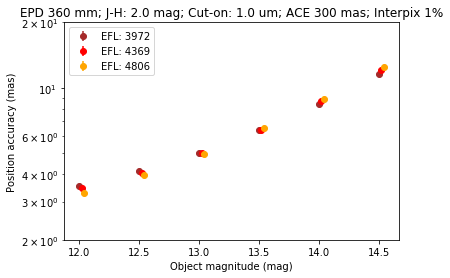

In [30]:
plt.figure(facecolor='white')
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylim([ymin, ymax])
ax.set_ylabel('Position accuracy (mas)')
ax.set_xlabel('Object magnitude (mag)')

keys = ['ctl2_det10_tel10b', 'ctl2_det10_tel10', 'ctl2_det10_tel10a']

for i, k in enumerate(keys):
    d = data[k]
    if d['cuton']==1.0 and i<=7:
        fct = pixsize/d['efl']/1e-3*180.*3600./np.pi*1000 # px -> mas conv. fct.
        ax.errorbar(d['data'][:,0]+i*0.02, d['data'][:,1]*fct, yerr=d['data'][:,2]*fct,
                    color=colors[i], marker='o', linestyle='None',
                    label='EFL: {:4.0f}'.format(d['efl']))
plt.legend()
plt.title('EPD 360 mm; J-H: 2.0 mag; Cut-on: 1.0 um; ACE 300 mas; Interpix 1%')